In [37]:
import pandas, numpy, scipy, fastcluster, seaborn, sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy import stats


## functions & options


In [38]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# I] Dataframe settings

In [39]:
# %%time
# #Download the big expression data with all the transcripts
# path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm.tsv"
# df_expr_all_tr = pandas.read_csv(path, sep = "\t", index_col='sample')

# print(df_expr_all_tr.shape)
# df_expr_all_tr.head()

In [40]:
##Do a subset to practice and save it
# # 10% of the transcrits for 10% of the samples
# df_gexpr_all_smallpart = df_expr_all_tr.iloc[:19704,:786]

# #save to csv
# path = "/xenabrowser_brut_data/all_transcripts/"
# df_gexpr_all_smallpart.to_csv(input_file_directory+path+'gtex_Kallisto_tpm_smallpart.tsv',sep = "\t")

In [41]:
%%time
#Download 10% of the big expression data with all the transcripts
path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm_smallpart.tsv"
df_gexpr_all_smallpart = pandas.read_csv(path, sep = "\t")

print(df_gexpr_all_smallpart.shape)
df_gexpr_all_smallpart.set_index('sample', inplace = True)
df_gexpr_all_smallpart.index.name = None
df_gexpr_all_smallpart.head()

(19704, 787)
Wall time: 2.37 s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-13NYB-2726-SM-5J2MT,GTEX-WEY5-0526-SM-3GIKZ,GTEX-WZTO-1326-SM-3NM8X,GTEX-13NYS-2926-SM-5IFGH,GTEX-11DXZ-0326-SM-5EGH1,GTEX-13PVQ-2726-SM-5L3H7,GTEX-WL46-0011-R7A-SM-3LK7X,GTEX-11GSP-0006-SM-5N9EL,GTEX-1399U-2526-SM-5L3DL,GTEX-ZTTD-0326-SM-57WFW
ENST00000548312.5,0.6076,-9.9658,-2.0383,-2.4547,-9.9658,-2.0296,-2.8442,-2.8942,-9.9658,-4.1466,...,-9.9658,-2.9253,-5.1778,-0.9757,-3.7210,-9.9658,-9.9658,-3.3207,-3.6066,-2.8274
ENST00000527779.1,2.6670,-0.3332,1.9686,0.8771,0.5483,0.8687,-1.4169,0.7208,-0.0964,-2.5380,...,-2.1829,-9.9658,-9.9658,1.3433,-1.1996,-0.2697,-2.8383,-1.7300,-0.4357,-0.1985
ENST00000454820.5,-9.9658,-9.9658,-4.0293,-9.9658,-9.9652,-3.0899,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9653,-9.9658,-6.5950,-7.7254,-9.9658
ENST00000535093.1,3.2928,0.8198,1.7315,-0.0599,0.0884,0.0295,-0.9753,0.8344,0.5548,-1.7844,...,-9.9658,-9.9658,-1.3200,-0.3266,-9.9658,-1.3678,-9.9658,-2.8688,-1.4905,0.9818
ENST00000346219.7,-9.9658,-7.7128,-1.4648,-8.9045,-9.9658,-9.9658,-9.9658,-1.4929,-9.9658,-4.2916,...,-9.9658,-9.9658,-5.0633,0.6634,-9.2692,-2.3985,-4.1396,-9.9658,-5.6737,-9.9658


In [42]:
#Calcul to have value from log2;  2**(x)-0.001
df_gexpr_all_smallpart = df_gexpr_all_smallpart.apply(lambda x: pow(2,x)-0.001)

#Calcul to have log2+1 from value;
df_gexpr_all_smallpart = df_gexpr_all_smallpart.apply(lambda x: numpy.log2(x+1))
df_gexpr_all_smallpart.head()

,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-13NYB-2726-SM-5J2MT,GTEX-WEY5-0526-SM-3GIKZ,GTEX-WZTO-1326-SM-3NM8X,GTEX-13NYS-2926-SM-5IFGH,GTEX-11DXZ-0326-SM-5EGH1,GTEX-13PVQ-2726-SM-5L3H7,GTEX-WL46-0011-R7A-SM-3LK7X,GTEX-11GSP-0006-SM-5N9EL,GTEX-1399U-2526-SM-5L3DL,GTEX-ZTTD-0326-SM-57WFW
ENST00000548312.5,1.334981e+00,-1.571525e-08,0.313188,2.405164e-01,-1.571525e-08,3.148972e-01,1.868237e-01,1.807989e-01,-1.571525e-08,7.787335e-02,...,-1.571525e-08,1.771432e-01,3.791150e-02,5.921514e-01,1.041147e-01,-1.571525e-08,-1.571525e-08,1.363032e-01,0.112490,1.888895e-01
ENST00000527779.1,2.877758e+00,8.421935e-01,2.296569,1.503695e+00,1.299457e+00,1.498259e+00,4.578739e-01,1.404410e+00,9.518594e-01,2.279644e-01,...,2.859734e-01,-1.571525e-08,-1.571525e-08,1.822245e+00,5.204434e-01,8.706543e-01,1.875468e-01,3.790131e-01,0.797706,9.033902e-01
ENST00000454820.5,-1.571525e-08,-1.571525e-08,0.084396,-1.571525e-08,5.844029e-07,1.589167e-01,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,...,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,4.843659e-07,-1.571525e-08,1.341859e-02,0.005364,-1.571525e-08
ENST00000535093.1,3.432842e+00,1.466842e+00,2.110941,9.696243e-01,1.044178e+00,1.014111e+00,5.922863e-01,1.476182e+00,1.303322e+00,3.665843e-01,...,-1.571525e-08,-1.571525e-08,4.849475e-01,8.451195e-01,-1.571525e-08,4.714286e-01,-1.571525e-08,1.838365e-01,0.438175,1.572370e+00
ENST00000346219.7,-1.571525e-08,5.423959e-03,0.444970,1.567053e-03,-1.571525e-08,-1.571525e-08,-1.571525e-08,4.375448e-01,-1.571525e-08,7.047481e-02,...,-1.571525e-08,-1.571525e-08,4.111471e-02,1.368942e+00,8.951499e-04,2.493381e-01,7.824867e-02,-1.571525e-08,0.026574,-1.571525e-08


In [51]:
#Remove genes which express less than the sum of ATG7(2)
df_gexpr_all_smallpart['sum'] = df_gexpr_all_smallpart.sum(axis=1)

In [9]:
# #see the sum of ATG7 1 and 2
# ATG7_1 = 'ENST00000354449.7'
# ATG7_2 = 'ENST00000354956.9'

# print(df_gexpr_all_smallpart['sum'][[ATG7_1, ATG7_2]])

KeyError: "None of [Index(['ENST00000354449.7', 'ENST00000354956.9'], dtype='object')] are in the [index]"

In [52]:
#ATG7 is not in the 10% dataframe
random_gene1 = "ENST00000622461.1"
random_gene2 = "ENST00000521725.1"

print(df_gexpr_all_smallpart['sum'][[random_gene1, random_gene2]])

ENST00000622461.1    530.815700
ENST00000521725.1    217.986171
Name: sum, dtype: float64


In [11]:
%%time
#put the good value
ATG7_2_sum = 653.958512
element_to_delete = []

print('shape with all the elements', df_gexpr_all_smallpart.shape)
#select all the elements in primary sites, and note which one are <20
working_elements = df_gexpr_all_smallpart["sum"].to_list()
for element in working_elements:
    if element < ATG7_2_sum:
        element_to_delete.append(element)

print('number of elements with lower expression than ATG7(2) is:', len(element_to_delete))

#Only keep the genes with samples expression sum is higher than ATG7(2) expression sum.     
for element in element_to_delete:
    df_gexpr_all_smallpart = df_gexpr_all_smallpart.loc[df_gexpr_all_smallpart["sum"] != element]
print('shape after removing the elements', df_gexpr_all_smallpart.shape)

df_gexpr_all_smallpart.head()

shape with all the elements (19704, 787)
number of elements with lower expression than ATG7(2) is: 14080
shape after removing the elements (5624, 787)
Wall time: 7min 40s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-WEY5-0526-SM-3GIKZ,GTEX-WZTO-1326-SM-3NM8X,GTEX-13NYS-2926-SM-5IFGH,GTEX-11DXZ-0326-SM-5EGH1,GTEX-13PVQ-2726-SM-5L3H7,GTEX-WL46-0011-R7A-SM-3LK7X,GTEX-11GSP-0006-SM-5N9EL,GTEX-1399U-2526-SM-5L3DL,GTEX-ZTTD-0326-SM-57WFW,sum
ENST00000527779.1,2.877758,0.842194,2.296569,1.503695,1.299457,1.498259,0.457874,1.404410,0.951859,0.227964,...,-1.571525e-08,-1.571525e-08,1.822245,5.204434e-01,0.870654,1.875468e-01,0.379013,0.797706,0.903390,799.263659
ENST00000535093.1,3.432842,1.466842,2.110941,0.969624,1.044178,1.014111,0.592286,1.476182,1.303322,0.366584,...,-1.571525e-08,4.849475e-01,0.845119,-1.571525e-08,0.471429,-1.571525e-08,0.183837,0.438175,1.572370,714.089300
ENST00000625998.2,2.172597,2.098120,0.604361,1.012243,1.839938,2.112940,1.961354,1.282651,2.350597,1.159347,...,1.366797e+00,1.211376e+00,2.569046,2.113336e-01,2.831389,6.730767e-01,0.588517,1.748814,2.345051,1446.679802
ENST00000583693.5,1.679476,1.659720,2.343766,2.182024,1.596109,1.608522,1.097292,2.342481,1.919266,0.945588,...,1.961503e+00,8.069324e-01,2.610582,8.293377e-01,2.331330,9.185289e-01,0.211430,0.809810,2.283758,1273.356953
ENST00000012134.6,0.028054,1.528813,1.308149,0.799196,0.096761,2.200149,1.560507,1.650502,1.646210,1.745232,...,1.962842e+00,1.299160e+00,2.036733,1.716641e+00,2.676615,2.280420e+00,0.290943,1.359823,2.312046,1337.646487


In [36]:
%%time
#For loop is not a good idea. I have to find another solution 
ATG7_2_sum = 653.958512
df_gexpr_all_smallpart[df_gexpr_all_smallpart.sum(axis=0) < ATG7_2_sum,:]

TypeError: '(GTEX-S4Q7-0003-SM-3NM8M        False
GTEX-QV31-1626-SM-2S1QC        False
GTEX-13OW5-0626-SM-5J2N2       False
GTEX-ZPCL-0126-SM-4WWC8        False
GTEX-S33H-1226-SM-4AD69        False
                               ...  
GTEX-13PVQ-2726-SM-5L3H7       False
GTEX-WL46-0011-R7A-SM-3LK7X    False
GTEX-11GSP-0006-SM-5N9EL       False
GTEX-1399U-2526-SM-5L3DL       False
GTEX-ZTTD-0326-SM-57WFW        False
Length: 786, dtype: bool, slice(None, None, None))' is an invalid key

In [43]:
#1%
small_smallpart = df_gexpr_all_smallpart.iloc[:1970,:78]

In [44]:
%%time
#evaluate the goodness score for each cluster to select the best possibility.
cluster_numbers = list(range(2, 40))
number_clust_L = [] 
goodness_chs_L = []
goodness_dbi_L = []
for nb in cluster_numbers:
    kmeans_model = KMeans(n_clusters = nb, random_state=1).fit(small_smallpart)
    labels = kmeans_model.labels_
    goodness_chs = metrics.calinski_harabasz_score(small_smallpart, labels)
    goodness_dbi = metrics.davies_bouldin_score(small_smallpart, labels)
    
    #save score in list
    number_clust_L.append(nb)
    goodness_chs_L.append(goodness_chs)
    goodness_dbi_L.append(goodness_dbi)

#convert to dict then to DF
d = dict(Number = number_clust_L, Goodness_CHS = goodness_chs_L, Goodness_DBI = goodness_dbi_L)
df = pandas.DataFrame.from_dict(d, orient='columns')
df.head()

Wall time: 10.9 s


,Number,Goodness_CHS,Goodness_DBI
0,2,1885.227007,0.821216
1,3,1515.063290,1.044800
2,4,1264.211777,1.215338
3,5,1067.987841,1.290703
4,6,935.179818,1.419058


the elbow curve is at between 9 and 11


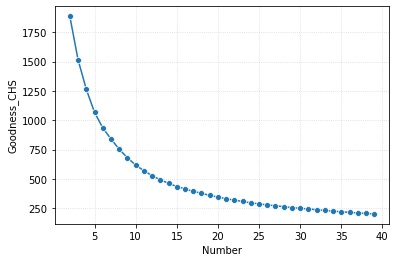

In [45]:
#plot the Goodness on the number to determine the best one.
##calinski_harabasz_score
seaborn.lineplot(data = df, x = 'Number', y = 'Goodness_CHS', marker="o")
plt.grid(ls=':', alpha = 0.5)
print('the elbow curve is at between 9 and 11')

the plateau start at 10


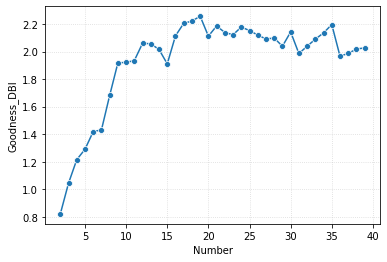

In [46]:
#davies_bouldin_score
seaborn.lineplot(data = df, x = 'Number', y = 'Goodness_DBI', marker="o")
plt.grid(ls=':', alpha = 0.5)
print('the plateau start at 10')

In [47]:
# 10 is the best number of cluster
kmeans_model = KMeans(n_clusters = 10, random_state=1).fit(small_smallpart)
# Find what cluster for each gene
pred_cluster = kmeans_model.predict(small_smallpart)
print(pred_cluster)
#add the prediction in a column
small_smallpart['cluster_10'] = pred_cluster
small_smallpart.head()

[9 8 1 ... 6 2 1]


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-X585-0008-SM-46MU4,GTEX-139T8-0011-R1a-SM-5HL75,GTEX-S4UY-0426-SM-3K2AF,GTEX-12WSD-2826-SM-59HKT,GTEX-NPJ7-0011-R6a-SM-2I3G7,GTEX-UPIC-1726-SM-4IHKG,GTEX-WZTO-0626-SM-4PQYY,GTEX-XPT6-0006-SM-4B66Q,GTEX-Y9LG-0226-SM-4VBS4,cluster_10
ENST00000548312.5,1.334981e+00,-1.571525e-08,0.313188,2.405164e-01,-1.571525e-08,3.148972e-01,1.868237e-01,1.807989e-01,-1.571525e-08,7.787335e-02,...,-1.571525e-08,-1.571525e-08,-1.571525e-08,6.710996e-01,3.759180e-01,-1.571525e-08,-1.571525e-08,1.407315e-01,2.247365e-01,9
ENST00000527779.1,2.877758e+00,8.421935e-01,2.296569,1.503695e+00,1.299457e+00,1.498259e+00,4.578739e-01,1.404410e+00,9.518594e-01,2.279644e-01,...,2.534203e+00,-1.571525e-08,1.395524e+00,1.261426e+00,-1.571525e-08,1.250490e+00,-1.571525e-08,2.643662e-01,1.427495e+00,8
ENST00000454820.5,-1.571525e-08,-1.571525e-08,0.084396,-1.571525e-08,5.844029e-07,1.589167e-01,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,...,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,-1.571525e-08,1
ENST00000535093.1,3.432842e+00,1.466842e+00,2.110941,9.696243e-01,1.044178e+00,1.014111e+00,5.922863e-01,1.476182e+00,1.303322e+00,3.665843e-01,...,2.448846e+00,-1.571525e-08,-1.571525e-08,3.187558e+00,5.141614e-01,8.037198e-01,5.526518e-01,-1.571525e-08,2.421860e+00,8
ENST00000346219.7,-1.571525e-08,5.423959e-03,0.444970,1.567053e-03,-1.571525e-08,-1.571525e-08,-1.571525e-08,4.375448e-01,-1.571525e-08,7.047481e-02,...,8.428712e-08,-1.571525e-08,7.798041e-02,-1.571525e-08,3.039544e-03,2.435501e-03,-1.571525e-08,-1.571525e-08,-1.571525e-08,9


In [48]:
# #ATG7 is not in the list
# ATG7_1 = 'ENST00000354449.7'
# ATG7_2 = 'ENST00000354956.9'

# print(small_smallpart['cluster_10'][[ATG7_1, ATG7_2]])

In [49]:
#let's take random ones
geneX = 'ENST00000346219.7'
geneY = 'ENST00000486061.1'

print(small_smallpart['cluster_10'][[geneX, geneY]])

ENST00000346219.7    9
ENST00000486061.1    8
Name: cluster_10, dtype: int32


In [50]:
'The two genes are not in the same cluster. They are different'

'The two genes are not in the same cluster. They are different'